<a href="https://colab.research.google.com/github/marianna13/Notebooks/blob/master/Classify%20Images%20of%20Ankles%20And%20Hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# create list of names of images to scrape from the web
names=['ankles', 'hands']

# base url to search images in google
url1='https://www.google.com/search?tbm=isch&q='

In [0]:
# create empty dictionary to store images
# in format Name_Of_Item --> list of images corresponding to this name

images={}

# for each item
for name in names:
  
  # get information from web page as html text
  page = requests.get(url1+name)
  soup = BeautifulSoup(page.text, 'html.parser')
  # find all images on the web page
  img_tags = soup.find_all('img')

  urls = [img['src'] for img in img_tags]
  # empty list to store images
  f=[]
 
  # add each image to list
  for url in urls:

    if 'http' not in url:
      url = '{}{}'.format(url1, url)

    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    f.append(img)
  
  # add to dictionary list of images as values
  # and names of items as keys
  images[name]=f



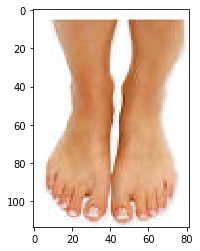

In [0]:
# let's look at one of the scraped images
plt.imshow(np.array(images[names[0]][0]))

In [0]:

import cv2


def to_array(dic):

  # this function takes dictionary wich contains 
  # pictures of hands and ankles
  # and transforms each image from PIL Image to numpy array,
  # scales them and resizes to the same resolution
  # to put images to the model

  dict_toarray={}

  for key in dic:
      list_array=[]

    for img in dic[key]:
      img=np.array(img)/255.
      img = cv2.resize(img, dsize=(250, 250), interpolation=cv2.INTER_CUBIC)
      list_array.append(img)
    dict_toarray[key]=list_array
  return dict_toarray

# convert images to numpy arrays
images=to_array(images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


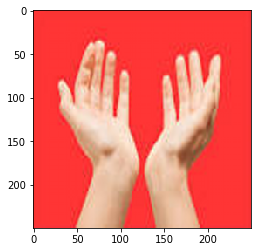

In [0]:
# let's look at one of resized images
plt.imshow(images[names[1]][16])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score as acc

# create labels: half of images are ankles (0)
# and other one is hands (1)
Y=np.zeros(40)
Y[20:]=np.ones(20)

# create training examples by concatenating
# two lists of images of ankles and hands
# then reshape X into shape that would be suitable for the future model
X=np.concatenate(tuple(images.values())).reshape(40,250*250*3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

(40, 187500)


In [0]:
# create model instance
reg = LogisticRegression()

# fit training data
reg.fit(X_train,y_train)

# make preductions
y_pred = reg.predict(X_test)

# print out quality of the predictions made by the model
acc(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7857142857142857